In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from importlib.machinery import SourceFileLoader
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def get_so4_setup(dataset, idx) :
	wantparams = ['SO4half_S', 'SO4max_S', 'WSO4_S']
	
	params = get_params(dataset, wantparams, idx)
	
	soilindex, waterindex = idx
	comparisons = [
                ('SO4(2-) ionic concentration', [waterindex], 'Observed SO4', [], 1.0),
				]
	
	return params, comparisons

def get_no3_setup(dataset, idx, obsname, which='R') :
	parname = 'denitrif_%s' % which
	wantparams = [parname]
	
	params = get_params(dataset, wantparams, idx)
	
	params[parname].set(min=-100.0, max=0.0)
	
	soilindex, waterindex = idx
	comparisons = [
				('NO3(-) ionic concentration', [waterindex], '%s NO3' %obsname, [], 1.0)
				]
	return params, comparisons


def get_nh4_setup(dataset, idx, obsname, which = 'R') :
	parname = 'nitrif_%s' % which
	wantparams = [parname]
	
	params = get_params(dataset, wantparams, idx)
	
	params[parname].set(min=-100.0, max=0.0, value=-50)
	
	soilindex, waterindex = idx
	comparisons = [
				('NH4(+) ionic concentration', [waterindex], '%s NH4' %obsname, [], 1.0)
				]
	return params, comparisons




def get_toc_soil_setup(dataset, idx) :
	
	wantparams = ['OA_S']
	
	params = magicopt.get_params(dataset, wantparams, idx)
	params['OA_S'].set(value=0)#, max=200)
	
	soilindex, waterindex = idx
	comparisons = [
		('pH', ['Soil'], 'Observed soil pH', [], 1.0),
	]
	
	return params, comparisons
    

def get_toc_lake_setup(dataset, idx) :
	
	wantparams = ['OA_R']
	
	params = magicopt.get_params(dataset, wantparams, idx)
	
	soilindex, waterindex = idx
	comparisons = [
		('pH', ['Lake'], 'Observed lake pH', [], 1.0),
	]
	
	return params, comparisons


	
def get_exchangable_base_cations_setup(dataset, idx, ecamax, emgmax, enamax, ekmax) :
	
    wantparams = ['ECa_S', 'EMg_S', 'ENa_S', 'EK_S']
    params = magicopt.get_params(dataset, wantparams, idx)
	
    #If we don't do this, we get selectivity coefficients of infinity
    params['ECa_S'].min = 0.01
    params['EMg_S'].min = 0.01
    params['ENa_S'].min = 0.01
    params['EK_S'].min  = 0.01
	
    params['ECa_S'].max = ecamax
    params['EMg_S'].max = emgmax
    params['ENa_S'].max = enamax
    params['EK_S'].max  = ekmax

    soilindex, waterindex = idx
    sat_wt = 1.0
    comparisons = [
                ('Exchangeable Ca on soil as % of CEC', [soilindex], 'Observed ECa', [], sat_wt),
                ('Exchangeable Mg on soil as % of CEC', [soilindex], 'Observed EMg', [], sat_wt),
                ('Exchangeable Na on soil as % of CEC', [soilindex], 'Observed ENa', [], sat_wt),
                ('Exchangeable K on soil as % of CEC', [soilindex], 'Observed EK', [], sat_wt),
                ]
	
    return params, comparisons
    

def get_weathering_base_cations_setup(dataset, idx, obsname, usemax=True):
    wantparams = ['WCa_S', 'WMg_S', 'WNa_S', 'WK_S']
    params = magicopt.get_params(dataset, wantparams, idx)

    if usemax:
        params['WCa_S'].max = params['WCa_S'].value
        params['WMg_S'].max = params['WMg_S'].value
        params['WNa_S'].max = params['WNa_S'].value
        params['WK_S'].max = params['WK_S'].value

    soilindex, waterindex = idx

    comparisons = [
        ('Ca(2+) ionic concentration', [waterindex], '%s Ca' %obsname, [], 1.0),
        ('Mg(2+) ionic concentration', [waterindex], '%s Mg' %obsname, [], 1.0),
        ('Na(+) ionic concentration', [waterindex], '%s Na' %obsname, [], 1.0),
        ('K(+) ionic concentration', [waterindex], '%s K' %obsname, [], 1.0),
        ]

    return params, comparisons



def get_params(dataset, wantparams, idx) :

	soilindex, waterindex = idx
	param_df = cu.get_double_parameters_as_dataframe(dataset, index_short_name={soilindex:'S', waterindex:'R'})
	
	calib_df = param_df[[any([sn.startswith(n) for n in wantparams]) for sn in param_df['short_name']]]
	
	params = cu.parameter_df_to_lmfit(calib_df)
	
	return params

Running lake 100

Goodness of fit for NH4(+) ionic concentration [Lake] vs Observed NH4 []:
Mean error (bias): -0.047770
Mean absolute error: 0.608331
Root mean square error: 0.786203
Nash-Sutcliffe coefficient: 0.048798
Number of observations: 16


Goodness of fit for NO3(-) ionic concentration [Lake] vs Observed NO3 []:
Mean error (bias): -0.056578
Mean absolute error: 0.302919
Root mean square error: 0.362100
Nash-Sutcliffe coefficient: -0.256488
Number of observations: 35


Goodness of fit for Ca(2+) ionic concentration [Lake] vs Observed Ca []:
Mean error (bias): -0.552402
Mean absolute error: 2.937950
Root mean square error: 4.112333
Nash-Sutcliffe coefficient: -0.601506
Number of observations: 35


Goodness of fit for Mg(2+) ionic concentration [Lake] vs Observed Mg []:
Mean error (bias): -0.216769
Mean absolute error: 1.453141
Root mean square error: 1.851047
Nash-Sutcliffe coefficient: -0.030400
Number of observations: 35


Goodness of fit for Na(+) ionic concentration [Lake] 

../../mobius_calib_uncert_lmfit.py:716: RuntimeWarning: divide by zero encountered in scalar divide
  nashsutcliffe = 1 - sumsquare / np.nansum(np.square(obs - meanob))



Goodness of fit for pH [Soil] vs Observed soil pH []:
Mean error (bias): 0.046609
Mean absolute error: 0.046609
Root mean square error: 0.046609
Nash-Sutcliffe coefficient: -inf
Number of observations: 1

(Parameters([('OA_S', <Parameter 'OA_S', value=0.06331986454355398, bounds=[0.0:200.0]>)]), 26)


../../mobius_calib_uncert_lmfit.py:716: RuntimeWarning: divide by zero encountered in scalar divide
  nashsutcliffe = 1 - sumsquare / np.nansum(np.square(obs - meanob))



Goodness of fit for Exchangeable Ca on soil as % of CEC [Soil] vs Observed ECa []:
Mean error (bias): -0.001373
Mean absolute error: 0.001373
Root mean square error: 0.001373
Nash-Sutcliffe coefficient: -inf
Number of observations: 1


Goodness of fit for Exchangeable Mg on soil as % of CEC [Soil] vs Observed EMg []:
Mean error (bias): 0.000187
Mean absolute error: 0.000187
Root mean square error: 0.000187
Nash-Sutcliffe coefficient: -inf
Number of observations: 1


Goodness of fit for Exchangeable Na on soil as % of CEC [Soil] vs Observed ENa []:
Mean error (bias): 0.000139
Mean absolute error: 0.000139
Root mean square error: 0.000139
Nash-Sutcliffe coefficient: -inf
Number of observations: 1


Goodness of fit for Exchangeable K on soil as % of CEC [Soil] vs Observed EK []:
Mean error (bias): 0.000101
Mean absolute error: 0.000101
Root mean square error: 0.000101
Nash-Sutcliffe coefficient: -inf
Number of observations: 1


Goodness of fit for pH [Lake] vs Observed lake pH []:
Mean e

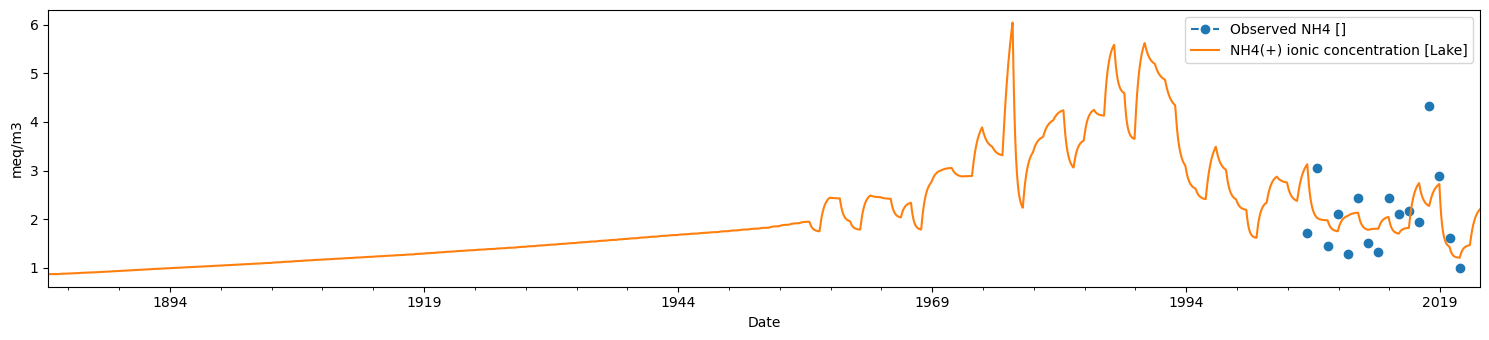

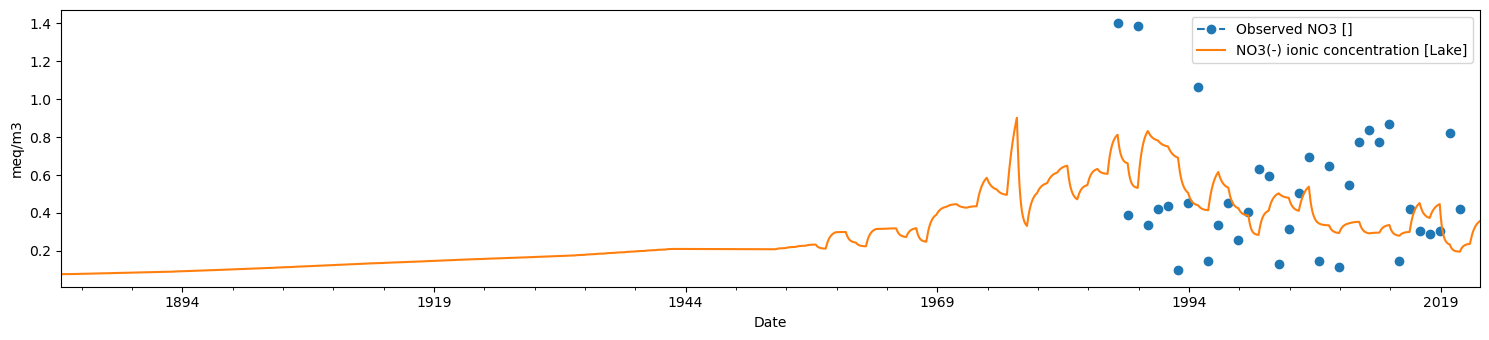

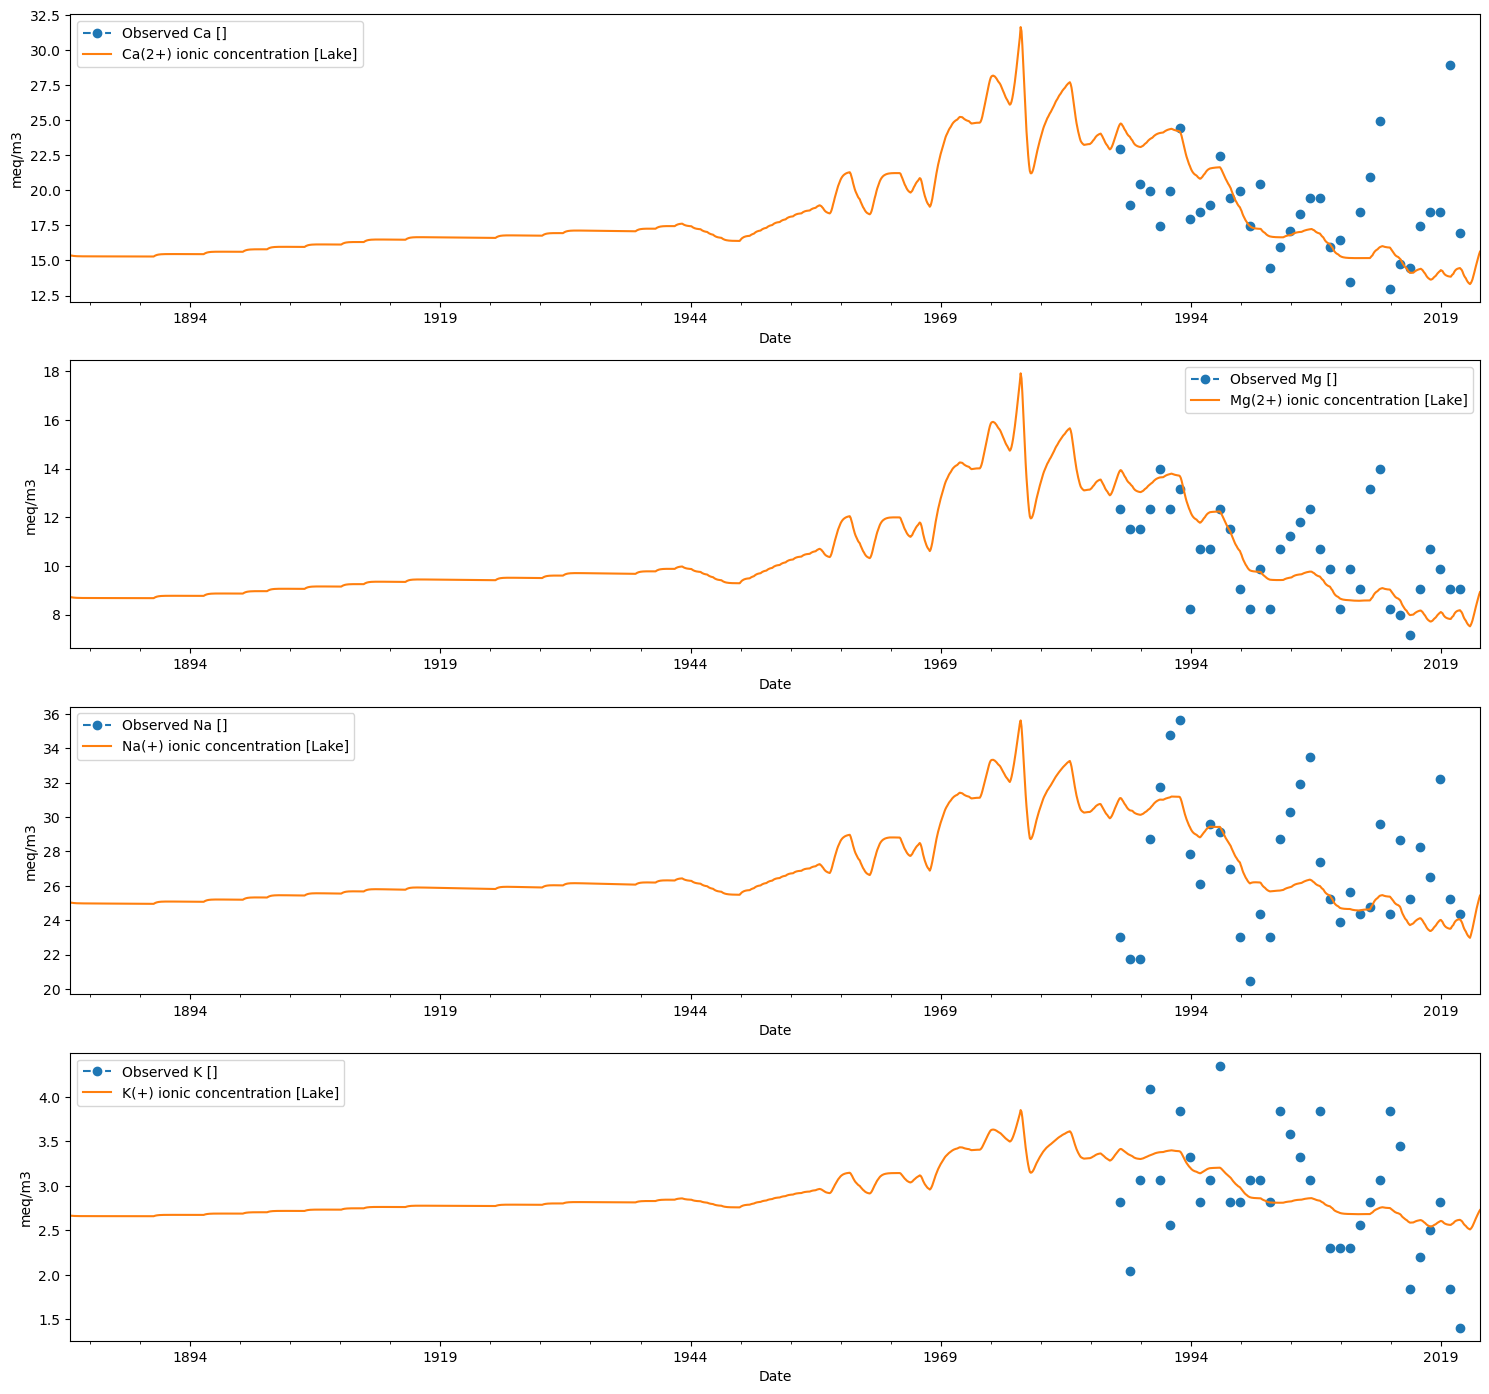

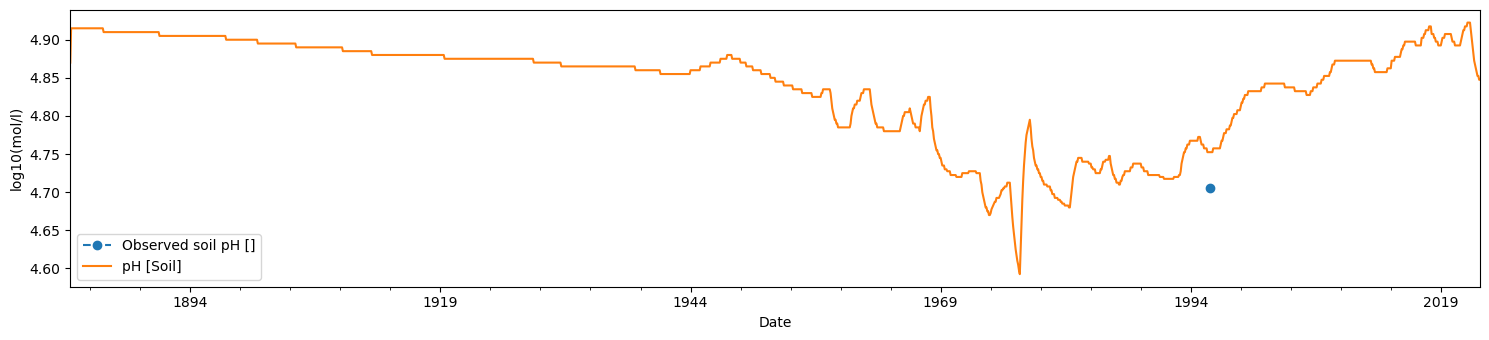

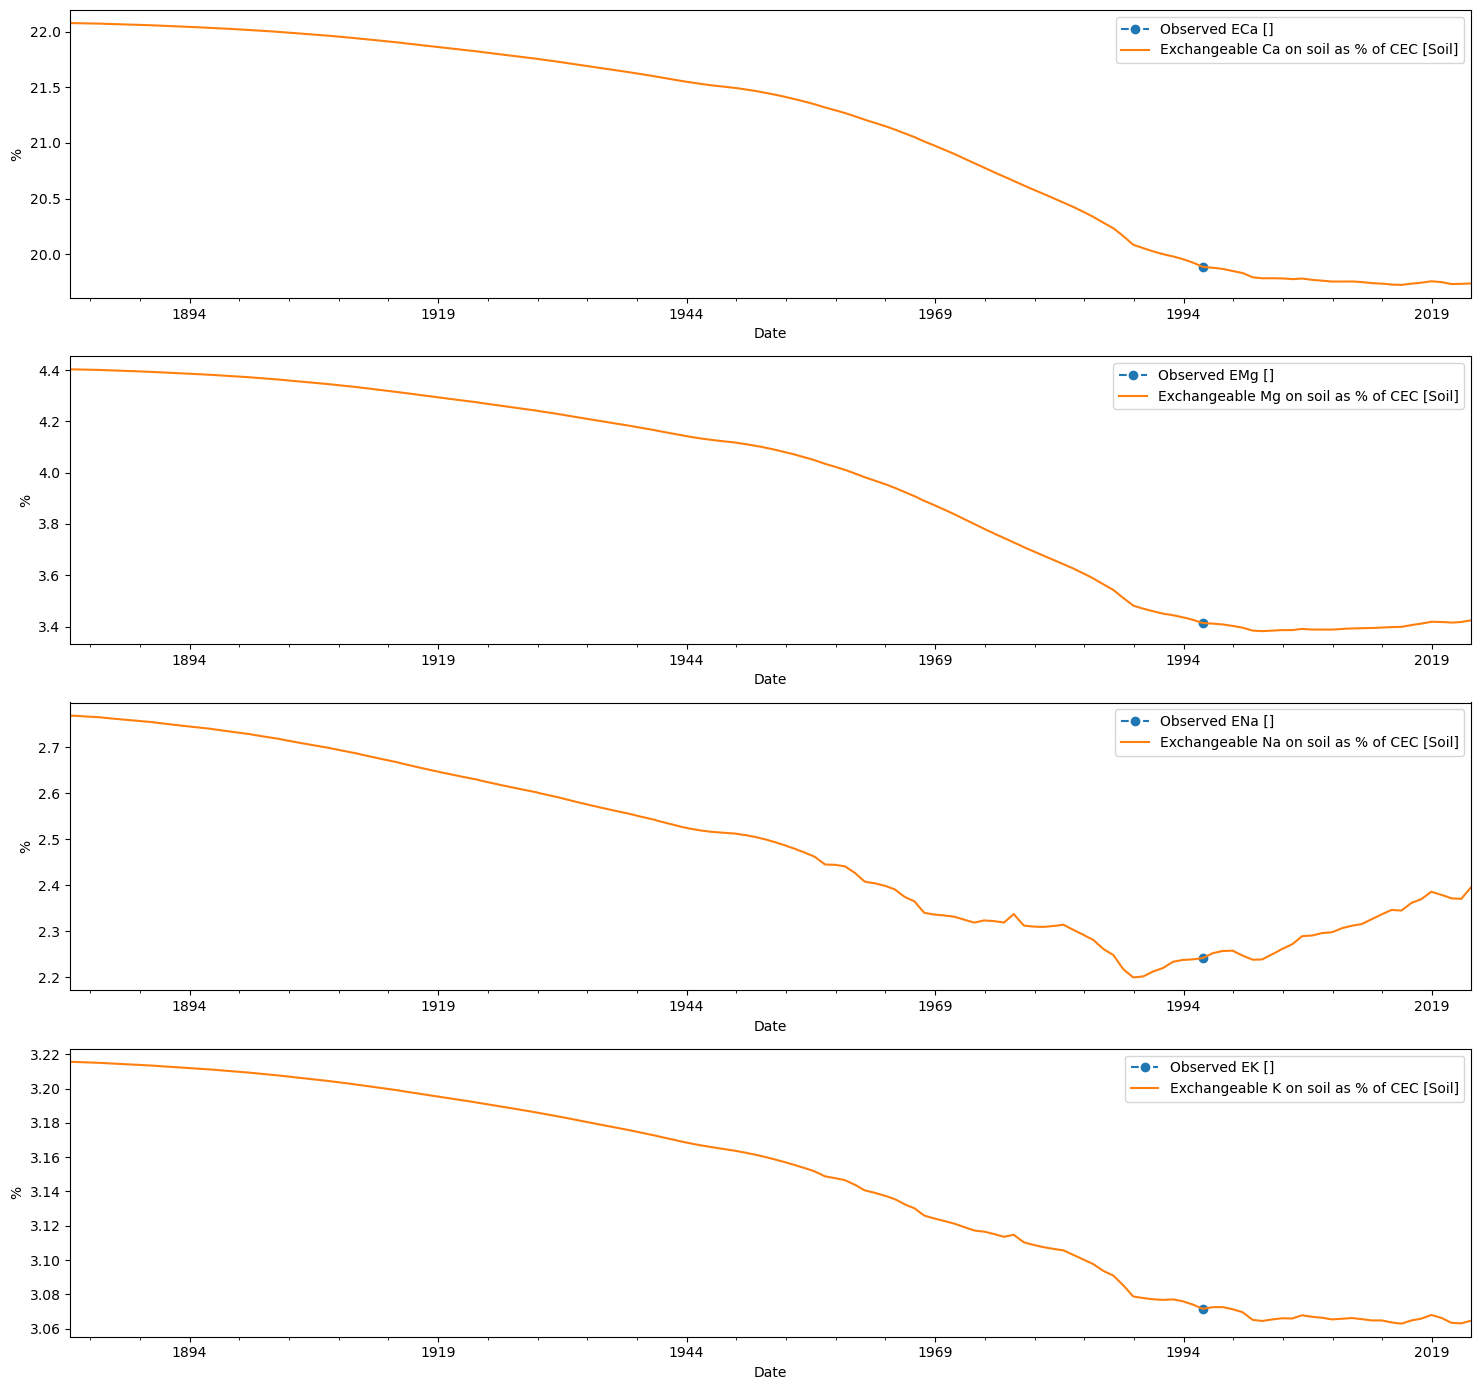

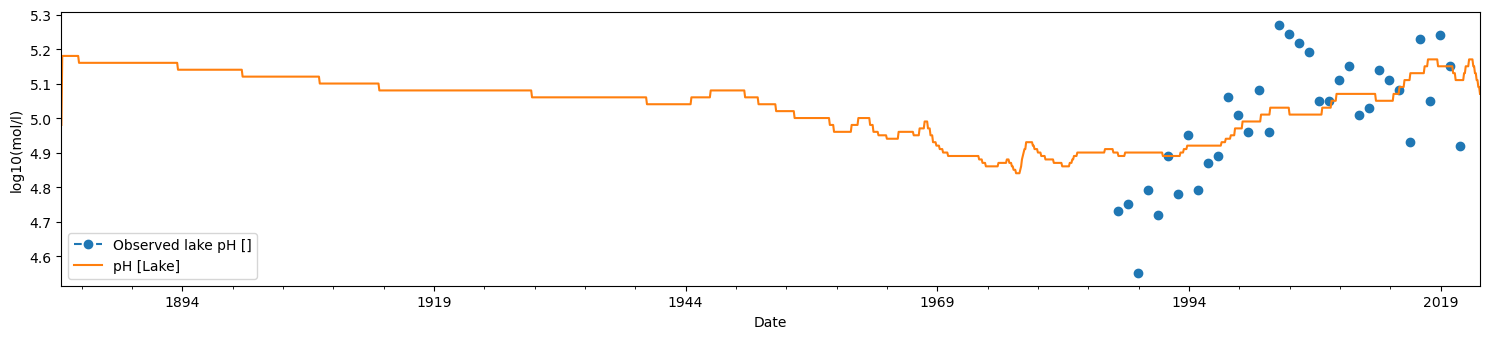

In [3]:
wr = SourceFileLoader("mobius", r"../../mobius.py").load_module()
cu = SourceFileLoader("mobius_calib_uncert_lmfit", r"../../mobius_calib_uncert_lmfit.py").load_module()

multi = SourceFileLoader("multiloop", r"../multiloop.py").load_module()
magicopt = SourceFileLoader("magicopt",  r"../magicopt.py").load_module()

wr.initialize('../../../Applications/MAGIC/magic_forest.so')

long_term_parameters_df = pd.read_csv('raw_data/water_soil_chem_hydro_depos_fixed_to_match_magic.csv')

# Get unique station ids
station_ids = long_term_parameters_df['station_id'].unique()

idx = ('Soil', 'Lake')

for i, station_id in enumerate(station_ids):

    print("Running lake %d" % station_id)
    
    parfile = "initial_data/lake_%d.dat"%station_id
    infile = "inputs/lake_%d.dat"%station_id

    ds = wr.DataSet.setup_from_parameter_and_input_files(parfile, infile)

    maxeca = ds.get_parameter_double("Initial exchangeable Ca on soil as % of CEC", ["Soil"])
    maxemg = ds.get_parameter_double("Initial exchangeable Mg on soil as % of CEC", ["Soil"])
    maxena = ds.get_parameter_double("Initial exchangeable Na on soil as % of CEC", ["Soil"])
    maxek = ds.get_parameter_double("Initial exchangeable K on soil as % of CEC", ["Soil"])

    ds.set_parameter_double("Initial exchangeable Ca on soil as % of CEC", ["Soil"], 20)
    ds.set_parameter_double("Initial exchangeable Mg on soil as % of CEC", ["Soil"], 10)
    ds.set_parameter_double("Initial exchangeable Na on soil as % of CEC", ["Soil"], 10)
    ds.set_parameter_double("Initial exchangeable K on soil as % of CEC", ["Soil"], 5)
    ds.set_parameter_double("Nitrification", ["Lake"], 0)
    ds.set_parameter_double("Cl sedimentation", ["Lake"], 0)

    # params, so4_comparisons = get_so4_setup(ds, idx)
    # res_pars = magicopt.calib(ds, params, so4_comparisons)
    # cu.print_goodness_of_fit(ds, so4_comparisons)
    # cu.plot_objective(ds, so4_comparisons)

    # params, nh4_comparisons = magicopt.get_nh4_setup(ds, idx, "Observed", which='S')
    # res_pars = magicopt.calib(ds, params, nh4_comparisons)
    # cu.print_goodness_of_fit(ds, nh4_comparisons)
    # cu.plot_objective(ds, nh4_comparisons)

    params, nh4_comparisons = get_nh4_setup(ds, idx, "Observed", which='R')
    res_pars = magicopt.calib(ds, params, nh4_comparisons)
    cu.print_goodness_of_fit(ds, nh4_comparisons)
    cu.plot_objective(ds, nh4_comparisons)
    #print(res_pars)

    
    params, no3_s_comparisons = get_no3_setup(ds, idx, "Observed", which='S')
    res_pars = magicopt.calib(ds, params, no3_s_comparisons)
    
    params, no3_r_comparisons = get_no3_setup(ds, idx, "Observed", which='R')
    res_pars = magicopt.calib(ds, params, no3_r_comparisons)
    cu.print_goodness_of_fit(ds, no3_r_comparisons)
    cu.plot_objective(ds, no3_r_comparisons)
    
    params, bc_comparisons =  get_weathering_base_cations_setup(ds, idx, obsname="Observed", usemax=True)
    res_pars = magicopt.calib(ds, params, bc_comparisons)
    cu.print_goodness_of_fit(ds, bc_comparisons)
    cu.plot_objective(ds, bc_comparisons)

    params, toc_s_comparisons =  get_toc_soil_setup(ds, idx)
    res_pars = magicopt.calib(ds, params, toc_s_comparisons)
    cu.print_goodness_of_fit(ds, toc_s_comparisons)
    cu.plot_objective(ds, toc_s_comparisons)
    print(res_pars)

    params, exch_bc_comparisons = get_exchangable_base_cations_setup(ds, idx, maxeca, maxemg, maxena, maxek)
    res_pars = magicopt.calib(ds, params, exch_bc_comparisons)
    cu.print_goodness_of_fit(ds, exch_bc_comparisons)
    cu.plot_objective(ds, exch_bc_comparisons)

    params, ph_l_comparisons = get_toc_lake_setup(ds, idx)
    res_pars = magicopt.calib(ds, params, ph_l_comparisons)
    cu.print_goodness_of_fit(ds, ph_l_comparisons)
    cu.plot_objective(ds, ph_l_comparisons)
    
    ds.write_parameters_to_file("calibrated_data/lake_%d.dat"%station_id)
    ds.delete() 
    break